In [243]:
rm(list=ls())

***
# ewastools

In [244]:
library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)
library(devtools)

In [246]:
setwd("~/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/")
dataDirectory <- getwd()  

In [248]:
sheet = read.csv("./phenotype_file_GSE191276.csv", header= T)

head(sheet)


,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor)
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor)


***
#### Leitura de idats



In [249]:
head(paste(dataDirectory,sheet$Basename,sep="/"))

### Moditicar o BASENAME para ter o caminho em que os .idat estão salvos
if("methdata.RData" %in% list.files("./")){
    load("./methdata.RData")
    print("Meth file loaded.")
    }else{
    meth = read_idats(paste(dataDirectory,sheet$Basename,sep = "/"))
    save(meth, file="./methdata.RData")
    }


[1] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSM5742874_202702240141_R05C01"
[2] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSM5742875_202702240141_R06C01"
[3] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSM5742876_202702240141_R08C01"
[4] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSM5742877_204088150175_R01C01"
[5] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSM5742878_204088150175_R02C01"
[6] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSM5742879_204088150175_R03C01"

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


[1] 1051815
  |                                                                      |   0%

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


  |==========                                                            |  14%

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


  |====================                                                  |  29%

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


  |==============================                                        |  43%

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


  |========================================                              |  57%

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


  |==================================================                    |  71%

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


  |============================================================          |  86%

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”


  |======================================================================| 100%


In [250]:
meth$manifest[1:5,]

probe_id,addressU,addressM,channel,next_base,chr,mapinfo,strand,probe_type,index,OOBi,Ui,Mi
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<fct>,<chr>,<int>,<int>,<int>,<int>
rs10796216,84632581,77745366,Red,A,,NA,,rs,1,1,838118,750746
rs2468330,55653201,NA,Both,,,NA,,rs,2,NA,536579,536579
rs213028,31661197,3637210,Red,T,,NA,,rs,3,2,317324,29821
rs951295,1777132,81605941,Grn,C,,NA,,rs,4,1,11371,796811
rs877309,79696145,NA,Both,,,NA,,rs,5,NA,774881,774881


***
#### Aplicando as control metrics
 * função control metrics
 * predict_sex()

In [251]:
sheet = as.data.table(sheet)
sheet[,exclude:=FALSE]
meth %>% control_metrics %>% sample_failure -> sheet$failed
fails <- subset(sheet, failed == "TRUE")
message("Failed Samples: ", nrow(fails))

Failed Samples: 0



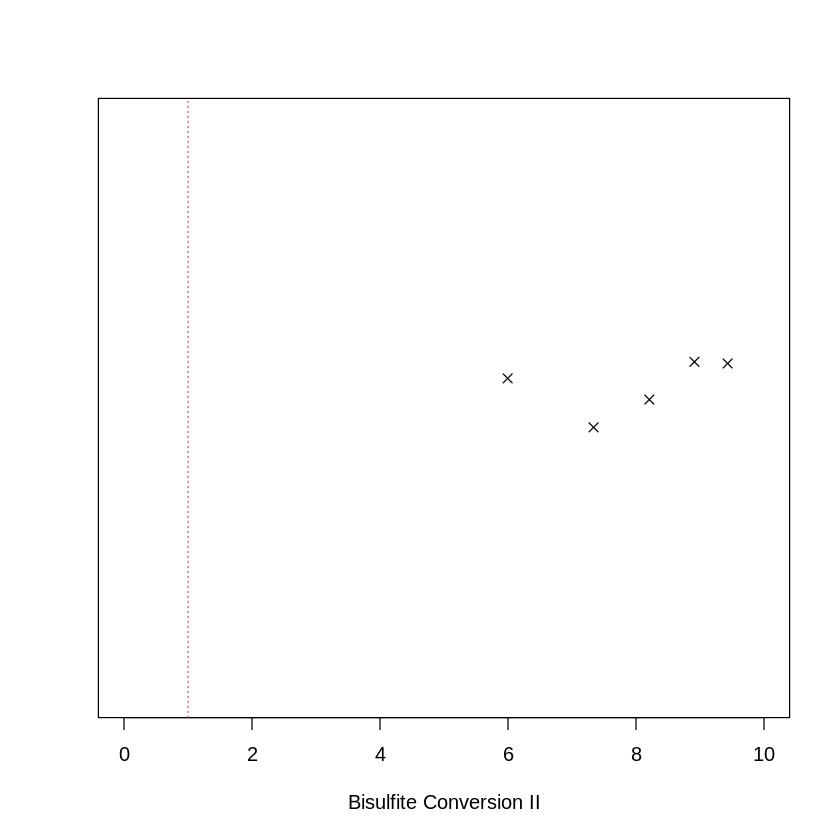

In [252]:
ctrls = control_metrics(meth)
stripchart(ctrls$`Bisulfite Conversion II`,method="jitter",pch=4,xlab='Bisulfite Conversion II',xlim=c(0,10))
abline(v=1,col=2,lty=3)

In [253]:
sheet$failed = sample_failure(ctrls)
table(sheet$failed)


FALSE 
    7 

In [254]:
meth %<>% ewastools::detectionP()
P.new = meth$detP

chrY = meth$manifest[chr=='Y',index]

male = which(sheet$Sex=="m")[1]
female = which(sheet$Sex=="f")[1]

P.new = P.new[chrY,c(male,female)]

P.new = colSums(P.new<0.01,na.rm=TRUE)

names(P.new) = c("male","female")

F     M undef 
130.5 534.0 517.0

       
        m f
  F     0 2
  M     4 0
  undef 0 1

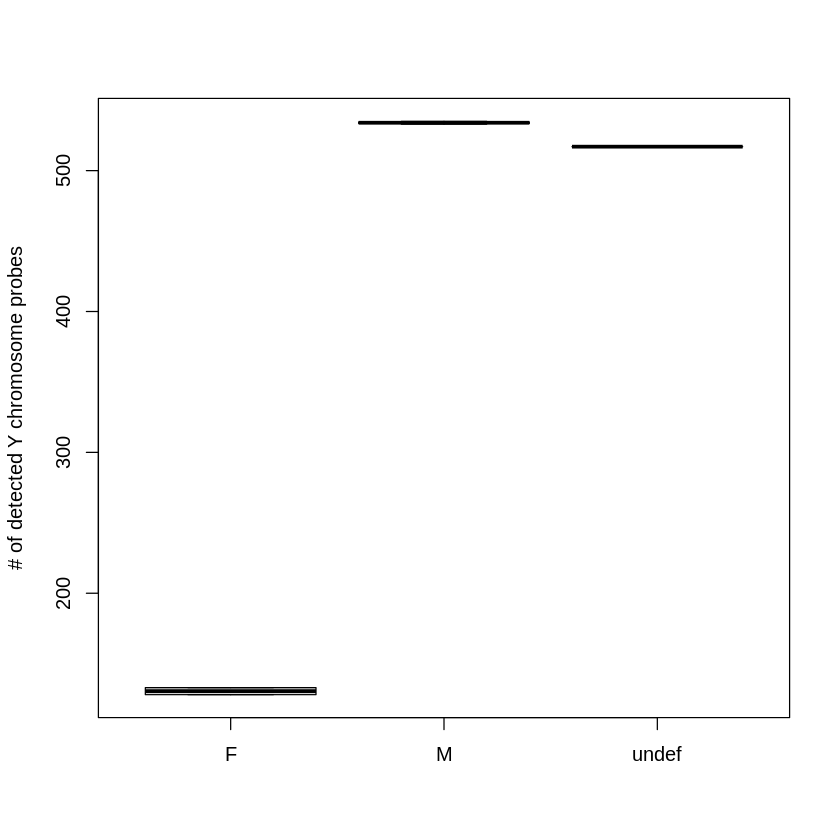

In [255]:
# 1. Obter o detectionP dos dados de metilação originais
detP = meth$detP[chrY,]

# 2. Calcular a quantidade das colunas de detP de cada indivíduo que obtem valor menor que 0.01 para o cromossomo Y
detP = colSums(detP<0.01,na.rm=TRUE)

# 3. Realizar um boxplot mostrando a distribução de detP < 0.01 em homens e mulheres ( de acordo com sexo biológico autodeclarado)
boxplot(split(detP,sheet$Sex),ylab="# of detected Y chromosome probes")

# 4. Calcuando a mediana das distribuições nas subamostras de homens e mulhres
split(detP,sheet$Sex) %>% sapply(median)


#------------------------------------------
#Aplicando as funções check_sex e predict_sex
sexpred = check_sex(meth) 
PredSex = predict_sex(sexpred$X, sexpred$Y)

sheet$predSex_X = sexpred$X
sheet$predSex_Y = sexpred$Y
sheet$predSex = PredSex

table(sheet$Sex,sheet$predSex)

In [256]:
detP

[1] 517 128 534 533 133 535 534

In [257]:
# Resolver as inconsistências de sexo na amostra 
# 1. Remover a classe undef da amostra
sheet <- sheet[which(sheet$Sex %in% c("M","F"))]
dim(sheet)

sheet$ewastoolsMismatch <- ifelse(sheet$Sex != toupper(sheet$predSex), TRUE, FALSE)

sheet[which(sheet$ewastoolsMismatch == TRUE),]


[1]  6 14

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,exclude,failed,predSex_X,predSex_Y,predSex,ewastoolsMismatch
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<fct>,<lgl>


***
#### Omitir probes que estiverem com mediana de detP < 0.01 

In [258]:
beta = meth %>% ewastools::mask(0.01)

In [259]:
beta %<>% correct_dye_bias

In [260]:
beta %<>% ewastools::dont_normalize()

save(beta,file="./raw_beta_ewastools.RData")


In [262]:
write.csv(sheet, "phenotype_file_GSE191276_ewastools.csv", row.names=F)

In [263]:
library(minfi)

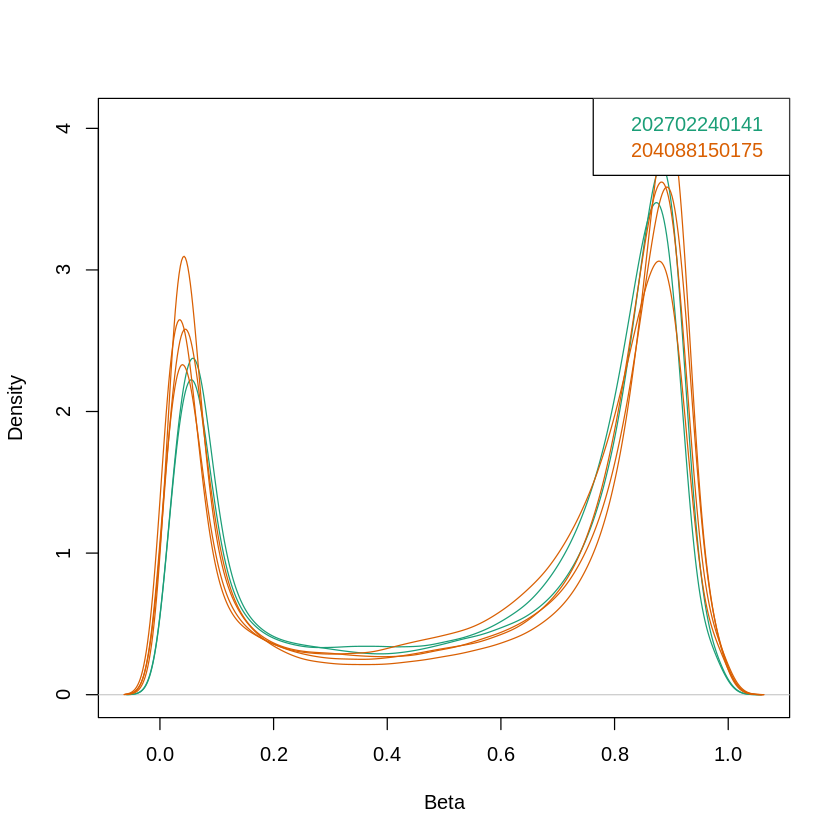

In [264]:
densityPlot(beta, sampGroups = sheet$Sentrix_ID)

In [265]:
rm(list=ls())

***
# Minfi

In [266]:
rm(list=ls())

In [267]:
library(minfi)

library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)

In [291]:
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/")

dataDirectory <- getwd() 

In [292]:
sheet=read.csv(file.path(dataDirectory,"phenotype_file_GSE191276.csv"))
head(sheet)

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor)
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor)


In [293]:
if (file.exists("./minfiRGset.RData")){
    load("./minfiRGset.RData")
} else{
    setwd(dataDirectory)
    RGSet <- minfi::read.metharray.exp(targets = sheet, verbose = FALSE, force = TRUE)
    save(RGSet, file = "./minfiRGset.RData")
}

In [294]:
MSet <- preprocessRaw(RGSet) 
MSet

ratioSet <- ratioConvert(MSet, what = "both", keepCN = TRUE)
GMRset <- mapToGenome(ratioSet)

class: MethylSet 
dim: 866091 7 
metadata(0):
assays(2): Meth Unmeth
rownames(866091): cg18478105 cg09835024 ... cg10633746 cg12623625
rowData names(0):
colnames(7): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(7): GeoID SampleID ... Sex filenames
Annotation
  array: IlluminaHumanMethylationEPIC
  annotation: ilm10b4.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.38.0
  Manifest version: 0.3.0

### Busca por sex mismacthes

In [295]:
predSex <-  getSex(GMRset)
predSex
sheet$predictedSex <- predSex$predictedSex

sheet$Sex <-  toupper(sheet$Sex)



if(!all(sheet$Sex == sheet$predictedSex)){
    mismatch <- sheet[which(sheet$Sex != sheet$predictedSex),]
   print(paste("Há discordância de sexos na amostra:", nrow(mismatch), "indivíduos"))
   print(mismatch)
} else{
    print("Não há discordância de sexos na amostra")
}

DataFrame with 7 rows and 3 columns
                                    xMed      yMed predictedSex
                               <numeric> <numeric>  <character>
GSM5742874_202702240141_R05C01   13.5306  12.75259            M
GSM5742875_202702240141_R06C01   13.8054   9.47168            F
GSM5742876_202702240141_R08C01   12.7141  13.06508            M
GSM5742877_204088150175_R01C01   12.3476  12.76466            M
GSM5742878_204088150175_R02C01   13.3737   8.38370            F
GSM5742879_204088150175_R03C01   12.9157  13.21037            M
GSM5742880_204088150175_R04C01   12.9558  13.22807            M

[1] "Há discordância de sexos na amostra: 1 indivíduos"
       GeoID            SampleID                       Basename   Sentrix_ID
1 GSM5742874 202702240141_R05C01 GSM5742874_202702240141_R05C01 202702240141
  Sentrix_Position Age   Sex    case.control ancestry predictedSex
1           R05C01  NA UNDEF Pooled controls     <NA>            M


##### Sex mismatch encontrado, vamos reportar o mismathc na amostra

In [296]:
sheet$minfiMismatch <- ifelse(sheet$Sex != sheet$predictedSex, TRUE, FALSE)
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,minfiMismatch
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,UNDEF,Pooled controls,NA,M,TRUE
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White,M,FALSE
GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE
GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE
GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE
GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor),M,FALSE


In [297]:
beta <- getBeta(ratioSet)
head(beta)[1:3,1:3]

,GSM5742874_202702240141_R05C01,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01
cg18478105,0.04226705,0.03134255,0.02482479
cg09835024,0.04235962,0.01633734,0.06291706
cg14361672,0.84236582,0.82757830,0.87517095


In [298]:
beta <- getBeta(GMRset)
head(beta)

Mval <- getM(GMRset)
head(Mval)

cn <- getCN(GMRset)
head(cn)

save(beta,file="./MINFI_raw_betaGMRset.RData")
save(GMRset, ratioSet, file ="./MINFI_ratioSet_GMRSet.RData")

,GSM5742874_202702240141_R05C01,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
cg14817997,0.6755901,0.7056056,0.76000000,0.8167623,0.6806998,0.6846424,0.6826098
cg26928153,0.9108351,0.9347629,0.93909163,0.9288172,0.9188198,0.9205045,0.8893638
cg16269199,0.7340313,0.8249841,0.82551112,0.8337838,0.7557061,0.7752809,0.6953148
cg13869341,0.8316377,0.8054633,0.87803752,0.8674722,0.7981630,0.7986025,0.8127746
cg14008030,0.4253382,0.4672655,0.47033866,0.4323929,0.3526455,0.4511728,0.4136604
cg12045430,0.1177015,0.1378938,0.07855726,0.1145412,0.1296852,0.1256524,0.1177946


,GSM5742874_202702240141_R05C01,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
cg14817997,1.0583303,1.2611121,1.6629650,2.1561996,1.0921055,1.1183622,1.1048033
cg26928153,3.3526413,3.8408354,3.9465534,3.7057942,3.5005817,3.5334790,3.0069499
cg16269199,1.4645849,2.2368808,2.2421526,2.3266122,1.6292077,1.7865964,1.1903468
cg13869341,2.3043860,2.0497763,2.8478452,2.7105231,1.9834923,1.9874318,2.1180795
cg14008030,-0.4341028,-0.1891742,-0.1713703,-0.3925499,-0.8763375,-0.2826718,-0.5032897
cg12045430,-2.9061335,-2.6443077,-3.5520780,-2.9505584,-2.7465240,-2.7987685,-2.9048416


,GSM5742874_202702240141_R05C01,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
cg14817997,11.76238,11.31685,10.98371,11.61563,11.83684,11.32136,11.99329
cg26928153,12.82277,13.10558,12.89520,12.18302,12.61425,12.78484,12.99947
cg16269199,12.88150,12.94490,12.92500,12.53138,12.45327,12.72366,12.73767
cg13869341,15.30549,15.35270,15.16863,15.12234,15.20526,15.26953,15.33004
cg14008030,14.71575,14.74120,14.68814,14.41660,14.51878,14.47187,14.65083
cg12045430,14.98313,14.98540,14.75890,14.65060,14.77386,14.79137,14.90623


In [299]:
detP <- detectionP(RGSet)


In [300]:
detP[1:3,1:2]

,GSM5742874_202702240141_R05C01,GSM5742875_202702240141_R06C01
cg18478105,0,0
cg09835024,0,0
cg14361672,0,0


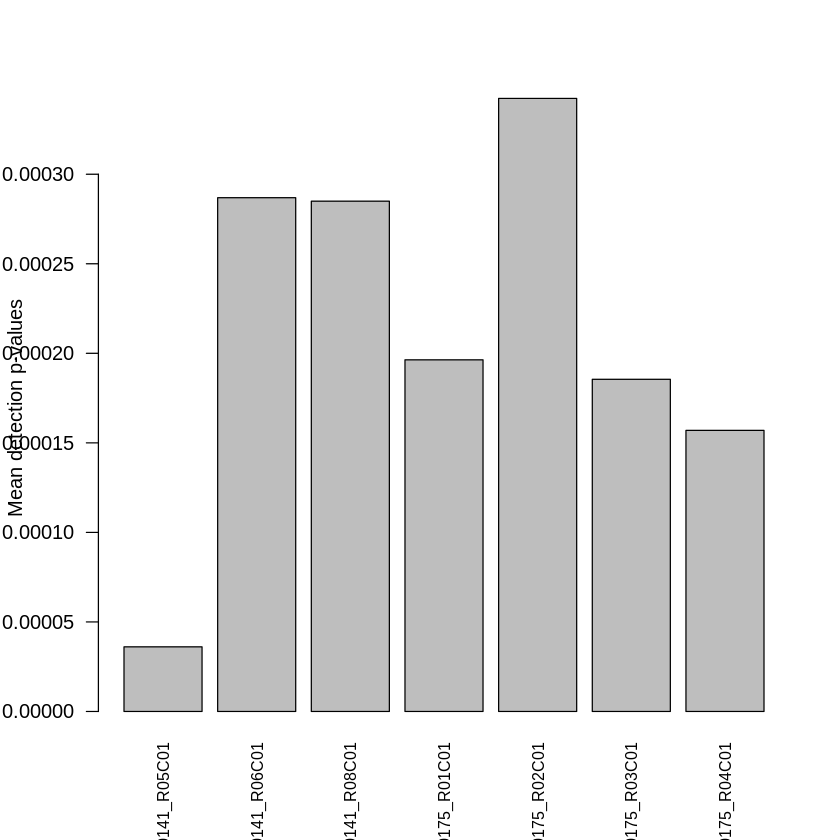

In [301]:
barplot(colMeans(detP), las=2, cex.names=0.8, ylab="Mean detection p-values")
abline(h=0.05,col="red")

***
Agora, iremos aplicar o conteole de qualidade sobre as intensidades medianas de Metilação/não-metilação

In [302]:
qc <- getQC(MSet)
QCmetrics <- cbind(sheet,qc)



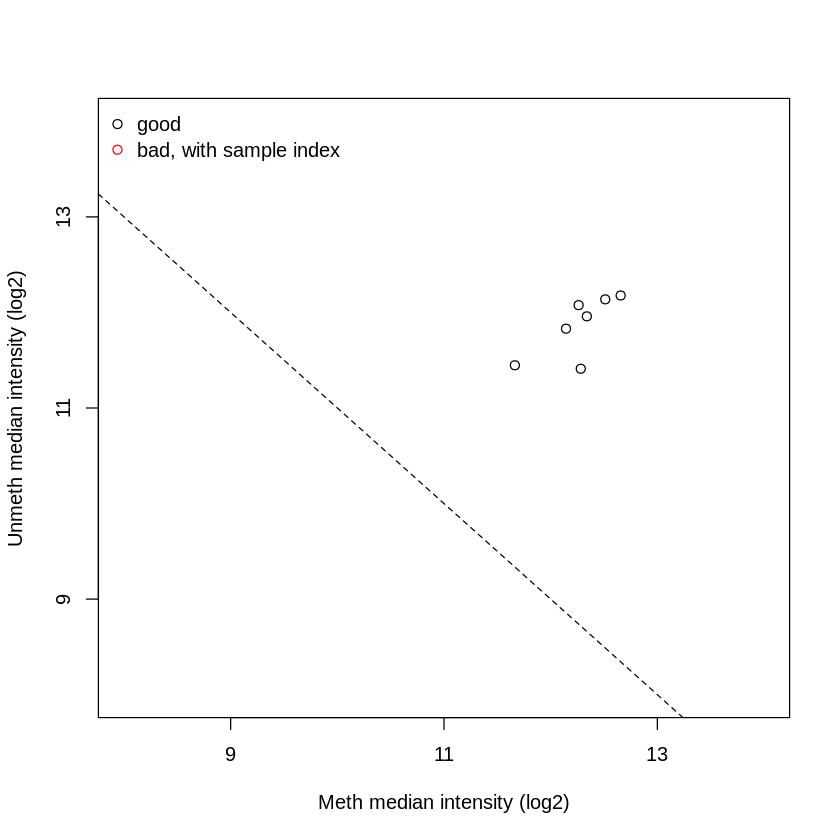

In [303]:
plotQC(qc)

 [1] GeoID            SampleID         Basename         Sentrix_ID      
 [5] Sentrix_Position Age              Sex              case.control    
 [9] ancestry         predictedSex     minfiMismatch    mMed            
[13] uMed            
<0 rows> (or 0-length row.names)


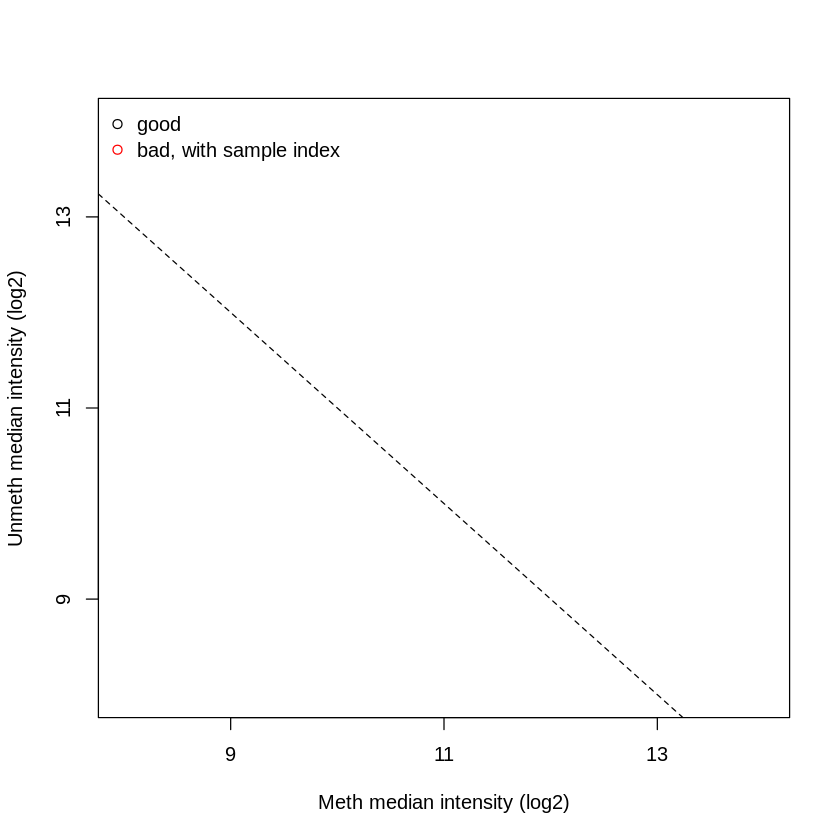

In [304]:
minfi_failed <- QCmetrics[ which(( (QCmetrics$mMed + QCmetrics$uMed)/2 < 10.5)), ]
print(minfi_failed)
QCmetrics$minfi_failed <- ifelse((QCmetrics$mMed + QCmetrics$uMed)/2 < 10.5, TRUE, FALSE)
plotQC(minfi_failed)

In [283]:
QCmetrics

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,minfiMismatch,mMed,uMed,minfi_failed
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<lgl>
GSM5742874_202702240141_R05C01,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,UNDEF,Pooled controls,NA,M,TRUE,12.51175,12.13699,FALSE
GSM5742875_202702240141_R06C01,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE,12.65620,12.17742,FALSE
GSM5742876_202702240141_R08C01,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White,M,FALSE,12.28222,11.41098,FALSE
GSM5742877_204088150175_R01C01,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE,11.66445,11.44708,FALSE
GSM5742878_204088150175_R02C01,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE,12.14402,11.83012,FALSE
GSM5742879_204088150175_R03C01,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,12.26209,12.07648,FALSE
GSM5742880_204088150175_R04C01,GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,12.33929,11.95928,FALSE


In [305]:
write.csv(QCmetrics, file="phenotype_file_GSE191276_minfi.csv", row.names=F, quote=F)


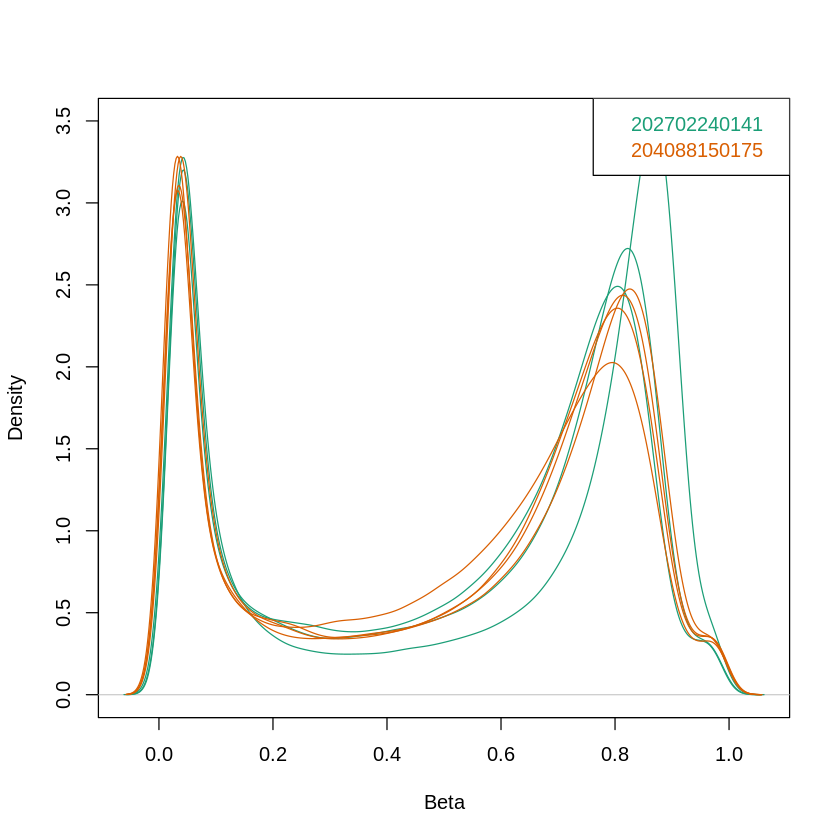

In [306]:
densityPlot(beta, sampGroups = sheet$Sentrix_ID)

In [340]:
rm(list=ls())

***
# ENmix 

In [1]:
library(ENmix)

library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)

Loading required package: parallel

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiff

In [2]:
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/")

dataDirectory <- ("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/")

In [3]:
sheet <- read.csv("./phenotype_file_GSE191276.csv")
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White
GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian
GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor)
GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor)
GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor)


In [4]:
dataDirectory
library(IlluminaHumanMethylationEPICanno.ilm10b2.hg19)
#rgSet <- read.metharray.exp(targets = sheet, extended = TRUE, force =TRUE)

if (file.exists("./enmix-rgSet.RData")){
    load("./enmix-rgSet.RData")
} else{
    setwd(dataDirectory)
    rgSet <- readidat(path = dataDirectory, verbose = TRUE)
    save(rgSet, file = "./enmix-rgSet.RData")
}
rgSet


[1] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/"

Loading required package: minfi

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: bumphunter

Loading required package: locfit

locfit 1.5-9.7 	 2023-01-02


Attaching package: ‘locfit’


The following object is masked from ‘package:purrr’:

    none




class: rgDataSet 
dim: 1008987 7 
metadata(3): ictrl Array annotation
assays(3): Red Green NBeads
rownames(1008987): 1600101 1600111 ... 99810978 99810992
rowData names(45): Name Address ... Methyl450_Loci Random_Loci
colnames(7): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
Array:  IlluminaHumanMethylationEPIC 
Annotation:  ilm10b2.hg19 

In [5]:
ls()

[1] "dataDirectory" "rgSet"         "sheet"

In [6]:
mraw <- getmeth(rgSet)

In [7]:
mraw
save(mraw, file = "./enmix-methylSet.RData")

class: methDataSet 
dim: 866150 7 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(866150): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(7): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
PreprocessMethod:   

In [8]:
beta_raw <- getB(mraw)
save(beta_raw, file = "./enmix-betaRaw.RData")

### Busca por sex mismatches 

In [9]:
predSex <- ENmix::predSex(rgSet)
predSex
sheet$predictedSex <- predSex$sex 

if(!all(sheet$Sex == sheet$predictedSex)){
    mismatch <- sheet[which(sheet$Sex != sheet$predictedSex),]
   print(paste("Há discordância de sexos na amostra:", nrow(mismatch), "indivíduos"))
   print(mismatch)
} else{
    print("Não há discordância de sexos na amostra")
}

,id,sex
,<chr>,<chr>
GSM5742874_202702240141_R05C01,GSM5742874_202702240141_R05C01,M
GSM5742875_202702240141_R06C01,GSM5742875_202702240141_R06C01,F
GSM5742876_202702240141_R08C01,GSM5742876_202702240141_R08C01,M
GSM5742877_204088150175_R01C01,GSM5742877_204088150175_R01C01,M
GSM5742878_204088150175_R02C01,GSM5742878_204088150175_R02C01,F
GSM5742879_204088150175_R03C01,GSM5742879_204088150175_R03C01,M
GSM5742880_204088150175_R04C01,GSM5742880_204088150175_R04C01,M


[1] "Há discordância de sexos na amostra: 1 indivíduos"
       GeoID            SampleID                       Basename   Sentrix_ID
1 GSM5742874 202702240141_R05C01 GSM5742874_202702240141_R05C01 202702240141
  Sentrix_Position Age   Sex    case.control ancestry predictedSex
1           R05C01  NA undef Pooled controls     <NA>            M


### quality checks

Vamos criar uma pasta separada para armazenar os gráficos gerados pelo QC do ENmix

In [10]:
system("mkdir ./ENmix-QCgraphs")
setwd("./ENmix-QCgraphs")

plotCtrl(rgSet)
setwd("../")

Plotting  STAINING .jpg 
Plotting  EXTENSION .jpg 
Plotting  HYBRIDIZATION .jpg 
Plotting  TARGET_REMOVAL .jpg 
Plotting  BISULFITE_CONVERSION_I .jpg 
Plotting  BISULFITE_CONVERSION_II .jpg 
Plotting  SPECIFICITY_I .jpg 
Plotting  SPECIFICITY_II .jpg 
Plotting  NON-POLYMORPHIC .jpg 
Plotting  NEGATIVE .jpg 
Plotting  NORM_A .jpg 
Plotting  NORM_C .jpg 
Plotting  NORM_G .jpg 
Plotting  NORM_T .jpg 
Plotting  NORM_ACGT .jpg 


Podemos abrir o nosso explorardor de arquivos e olhar os diversos gráficos para avaliar o compartamento das amostras e, se necessário, excluí-las.
***
#### QCInfo()

In [10]:
qc<-QCinfo(rgSet,detPtype="negative",detPthre=0.000001)
save(qc, file = "enmix-qc.RData")

0  samples with percentage of low quality CpG value greater than  0.05  or bisulfite intensity less than  13526.35 
2818  CpGs with percentage of low quality value greater than  0.05 
Ploting qc_sample.jpg ...Done
Ploting qc_CpG.jpg ...Done
Identifying ourlier samples based on beta or total intensity values...
After excluding low quality samples and CpGs
0  samples are outliers based on averaged total intensity value 
1  samples are outliers in beta value distribution 
1  outlier samples were added into badsample list
RECOMMAND: set outlier=FALSE or double check total intensity and beta value 
     distribution plots to confirm
Ploting freqpolygon_beta_beforeQC.jpg ...Done
Ploting freqpolygon_beta_afterQC.jpg ...Done


O QC do ENmix entregou uma amostra marcada como "BadSample" na distribuição beta. Sendo assim, iremos excluí-la.

In [10]:
qc$badsample

[1] "GSM5742876_202702240141_R08C01"

In [11]:
sheet$enmixfailed <- ifelse(sheet$Basename %in% qc$badsample, TRUE,FALSE)
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,enmixfailed
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA,M,FALSE
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White,M,TRUE
GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE
GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE
GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE
GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor),M,FALSE


In [12]:
write.csv(sheet,"phenotype_file_GSE191276_enmix.csv")

***
O processENmix já irá gerar um methylSet corrigido para dye-bias e background correction.

Além disso, ele irá excluir as probes e indivíduos sinalizados como "basamples" ou "badcpgs" indicados no QC.

### Atenção!!!
* O numero de cores em nCores deve ser escolhido com cautela em computadores pessoais, já que mais cores demandam maior poder computacionao. Isto, pode acabar deixando o seu computador lento.
* Entretanto, em HPCs *(High Performance Computers)* como servidores externos mais poderosos, quanto mais cores disponíveis você puder utilizarmais rápido será o processamento
    * **Recomendado**: 1 a 3 cores em computadores comumns.

In [14]:
mdat <- preprocessENmix(rgSet, bgParaEst="oob", dyeCorr="RELIC",
                      QCinfo=qc, nCores=3)

In [17]:
mdat

class: methDataSet 
dim: 863332 6 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(863332): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(6): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
PreprocessMethod:  Backgroud_corr: ENmix,oob dyeBiasCorrection: RELIC 

***
Para obter um MethylSet sem nenhuma correção, vc pode usar o getMeth()

In [18]:
beta <- ENmix::getB(mdat, "illumina")

In [19]:
head(beta)

,GSM5742874_202702240141_R05C01,GSM5742875_202702240141_R06C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
cg00000622,0.007329217,0.010672027,0.006730568,0.002323093,0.009647042,0.008670895
cg00001245,0.017519944,0.009027277,0.009261359,0.005474636,0.004596648,0.006741265
cg00001510,0.478936680,0.453800202,0.415116189,0.524153791,0.520342476,0.475634094
cg00001583,0.045661149,0.066212350,0.049407447,0.028333029,0.023465368,0.041673127
cg00001594,0.012858414,0.017400333,0.022928201,0.017643005,0.013877128,0.016788938
cg00001687,0.991409054,0.990337979,0.990747805,0.991541035,0.988941580,0.988807988


In [21]:
save(beta, file ="./enmix-beta-processENmix.RData")

In [339]:
rm(list=ls())